In [31]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [32]:
data = pd.read_csv('NSE_data_all_stocks_2020.csv')

In [33]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-20,EGAD,Eaagads Ltd,8.2,14,10.1,10.1,10.1,10.1,NaN,NaN,NaN,NaN
1,2-Jan-20,KUKZ,Kakuzi Plc,300,423.5,340,340,340,340,NaN,NaN,NaN,NaN
2,2-Jan-20,KAPC,Kapchorua Tea Kenya Plc,59,95,80,80,80,80,NaN,NaN,NaN,NaN
3,2-Jan-20,LIMT,Limuru Tea Plc,385,475,450,450,450,450,NaN,NaN,NaN,NaN
4,2-Jan-20,SASN,Sasini Plc,14.8,19.6,16.15,16.15,16.15,16.9,-0.75,4.44%,300,NaN


In [34]:
data.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
17887,31-Dec-20,^N20I,NSE 20-Share Index,1723.96,2706.38,1868.39,1868.39,1868.39,1853.06,15.33,0.83%,NaN,NaN
17888,31-Dec-20,^N25I,NSE 25-Share Index,2935.01,4207.9,3415.24,3415.24,3415.24,3385.77,29.47,0.87%,NaN,NaN
17889,31-Dec-20,^NASI,NSE All-Share Index,124.3,171.36,152.11,152.11,152.11,150.97,1.14,0.76%,NaN,NaN
17890,31-Dec-20,^ZKEQTK,Zamara Kenya Equity Index (KES),1511.03,2242.89,1781.3,1781.3,1781.3,1770.26,11.04,0.62%,NaN,NaN
17891,31-Dec-20,^ZKEQTU,Zamara Kenya Equity Index (USD),1201.29,1905.4,1404.48,1404.48,1404.48,1395.15,9.33,0.67%,NaN,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       17892 non-null  object 
 1   CODE       17892 non-null  object 
 2   NAME       17892 non-null  object 
 3   12m Low    17892 non-null  object 
 4   12m High   17892 non-null  object 
 5   Day Low    17892 non-null  object 
 6   Day High   17892 non-null  object 
 7   Day Price  17892 non-null  object 
 8   Previous   17892 non-null  object 
 9   Change     10817 non-null  float64
 10  Change%    10812 non-null  object 
 11  Volume     11146 non-null  object 
 12  Adjust     0 non-null      float64
dtypes: float64(2), object(11)
memory usage: 1.8+ MB


In [36]:
data.isnull()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,False,False,False,False,False,False,False,False,False,False,False,True,True
17888,False,False,False,False,False,False,False,False,False,False,False,True,True
17889,False,False,False,False,False,False,False,False,False,False,False,True,True
17890,False,False,False,False,False,False,False,False,False,False,False,True,True


In [37]:
data.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         0
Change        7075
Change%       7080
Volume        6746
Adjust       17892
dtype: int64

In [38]:
#fill missing values with 0
df = data.fillna(0)
df

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-20,EGAD,Eaagads Ltd,8.2,14,10.1,10.1,10.1,10.1,0.00,0,0,0.0
1,2-Jan-20,KUKZ,Kakuzi Plc,300,423.5,340,340,340,340,0.00,0,0,0.0
2,2-Jan-20,KAPC,Kapchorua Tea Kenya Plc,59,95,80,80,80,80,0.00,0,0,0.0
3,2-Jan-20,LIMT,Limuru Tea Plc,385,475,450,450,450,450,0.00,0,0,0.0
4,2-Jan-20,SASN,Sasini Plc,14.8,19.6,16.15,16.15,16.15,16.9,-0.75,4.44%,300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,31-Dec-20,^N20I,NSE 20-Share Index,1723.96,2706.38,1868.39,1868.39,1868.39,1853.06,15.33,0.83%,0,0.0
17888,31-Dec-20,^N25I,NSE 25-Share Index,2935.01,4207.9,3415.24,3415.24,3415.24,3385.77,29.47,0.87%,0,0.0
17889,31-Dec-20,^NASI,NSE All-Share Index,124.3,171.36,152.11,152.11,152.11,150.97,1.14,0.76%,0,0.0
17890,31-Dec-20,^ZKEQTK,Zamara Kenya Equity Index (KES),1511.03,2242.89,1781.3,1781.3,1781.3,1770.26,11.04,0.62%,0,0.0


In [39]:
df.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [40]:
df['NAME'].value_counts()

Eaagads Ltd                           252
Kenya Re-Insurance Corporation Ltd    252
Olympia Capital Holdings Ltd          252
Kurwitu Ventures Ltd                  252
Home Afrika Ltd                       252
                                     ... 
Longhorn Publishers Plc               252
Kenya Airways Plc                     252
Express Kenya Plc                     252
Eveready East Africa Ltd              252
Zamara Kenya Equity Index (USD)       252
Name: NAME, Length: 71, dtype: int64

In [41]:
df.dtypes

DATE          object
CODE          object
NAME          object
12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change       float64
Change%       object
Volume        object
Adjust       float64
dtype: object

Text(0, 0.5, 'Change')

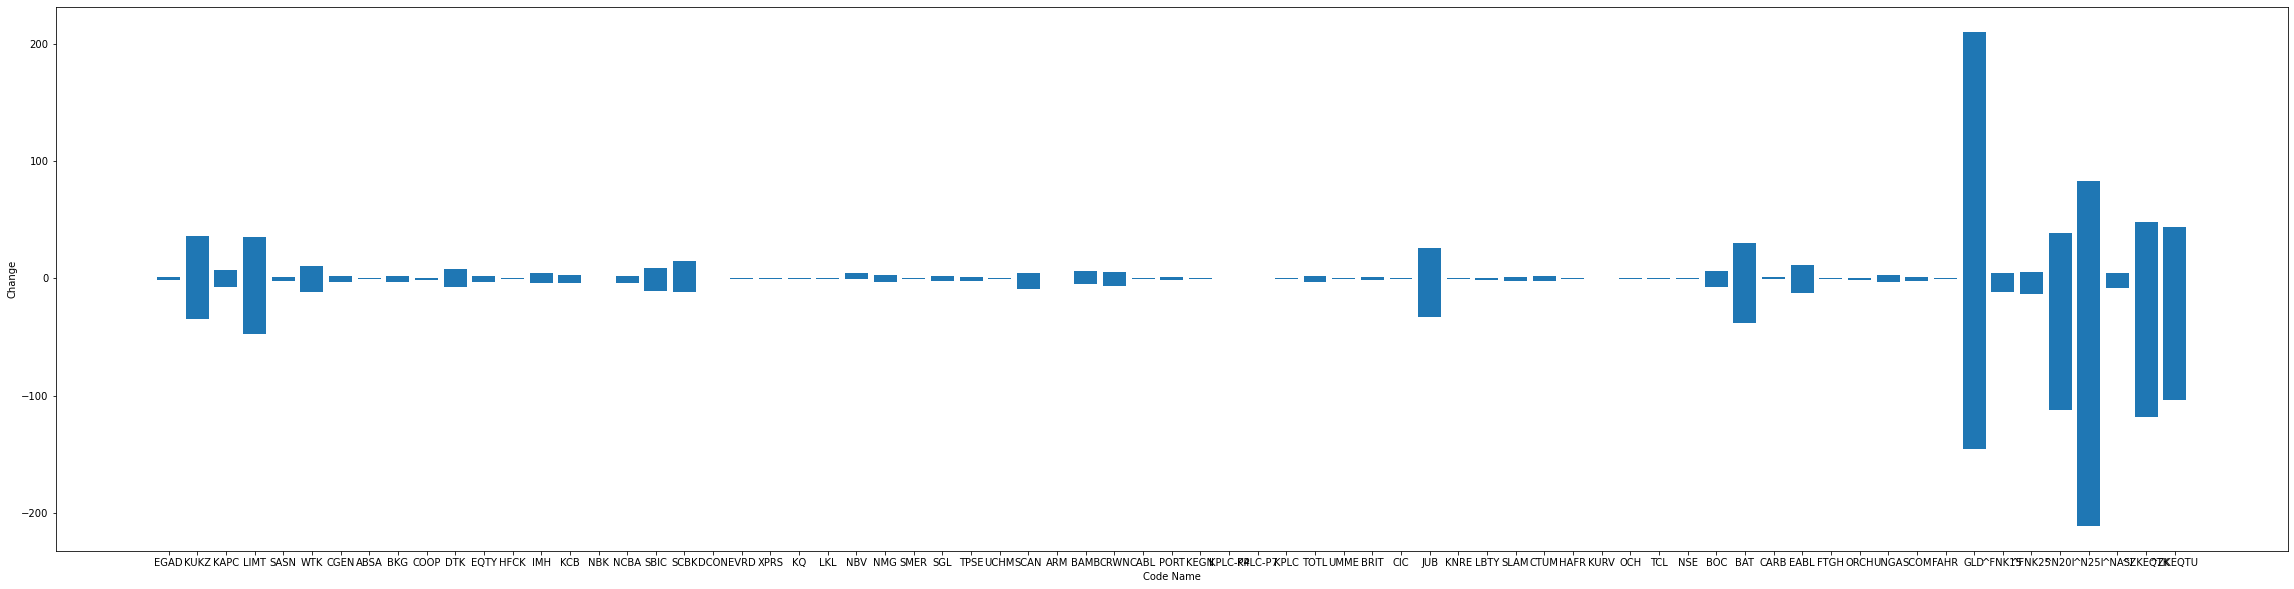

In [43]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Change'])
plt.xlabel('Code Name')
plt.ylabel('Change')

In [46]:
df.columns

Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
      dtype='object')